# Testing recent news headline topic analysis with existing an Latent Dirichlet allocation (LDA) model
Here, we test our existing LDA topic model against a more recent batch of news headlines pulled from CNN, from April 20 - May 15, 2020.

Our assumption is that the world has changed so drastically since 2016 that our existing topic model will perform poorly and a new topic model will generate entirely different categories.

## Credit
Parts of this work borrow from excellent Susan Li's ["Topic Modeling and LDA in Python"](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24) tutorial.

# Load the data from CSV, dependencies

In [1]:
# import dependencies
import pandas as pd

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import numpy as np
import random
np.random.seed(22)

import matplotlib.pyplot as plt
import joblib

# Load the pre-trained model
lda_bow = joblib.load('lda_bow_improved.gz')

[nltk_data] Downloading package wordnet to /Users/stacy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import the data
data = pd.read_csv("../Data/Combined_News_NASDAQ.csv")

In [4]:
data.head()

# 20 records from April 20 - May 15, 2020

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_headlines,daily_topic_existing_lda,daily_words_existing_lda
0,2020-04-20,0.0,"The US and China Want a Divorce, but Neither C...",The OnePlus 8 series is much cheaper in India ...,Facebook launches COVID-19 data maps for the U...,A guide to the NFL Draft: How to watch and wha...,"How to Do Less, With Journalist Celeste Headlee","What It Will Take to Reopen Everything, Accord...",Coronavirus: Reporter challenges Trump over Cu...,Deepwater Horizon: a decade of disaster,...,'No way food safety not compromised': US regul...,Landlords on the pandemic: 'Everyone has an im...,Severe weather hits Southern US,Jane Goodall says COVID-19 arose from our disr...,"Zoom, Skype, Microsoft Teams: Why you should c...",Facebook's interactive COVID-19 map displays s...,"All the things COVID-19 will change forever, a...",The US and China Want a Divorce but Neither C...,9,"0.010*""say"" + 0.009*""government"" + 0.008*""elec..."
1,2020-04-21,0.0,Viruses Make Us Question What It Means to Be A...,Can You Be Happy in Quarantine?,Dr. Gupta takes virus test,How to End a Video Call Politely,The US Cities With the Worst Air Pollution All...,Marketing data platform Adverity raises $30M S...,Trump claims he will temporarily suspend immig...,What a century of fighting the flu tells us ab...,...,Trump orders US borders closed to immigrants a...,Trump plans to suspend immigration to US amid ...,Telecom's Latest Dumb Claim: The Internet Only...,US hydroxychloroquine study shows no benefit t...,Razer's updated Blade Stealth gets a faster di...,The bootstrapper creates value,The bootstrapper creates value,Viruses Make Us Question What It Means to Be A...,8,"0.010*""government"" + 0.009*""internet"" + 0.007*..."
2,2020-04-22,1.0,Herd Immunity Won't Save Us,Sometimes the Best Cocktail Is a Glass of Wine,Chinese EV startup Byton furloughs hundreds in...,George Steinmetz's Bird's-Eye View of the Earth,The Deepwater Horizon Disaster Fueled a Gulf S...,Viral texts about coronavirus lockdown were am...,Facebook and Instagram test location labels to...,Is your family's chewing and slurping driving ...,...,US Treasury Chief Steve Mnuchin says most of t...,Russische Wahleinflussnahme: US-Senatssausschu...,Netflix subscribers soar like crazy as coronav...,The Latest: WHO chief hopes US will reconsider...,US failed to block UN virus vaccine resolution,TSA employees have contracted COVID-19 at 58 a...,Will There Be A Meat Shortage Because Of The C...,Herd Immunity Won t Save Us Sometimes the Best...,9,"0.010*""say"" + 0.009*""government"" + 0.008*""elec..."
3,2020-04-23,0.0,‘Pokémon Journeys’ will be a Netflix exclusive...,How Argentina’s Strict Covid-19 Lockdown Saved...,Gogoro’s first e-bike is coming to the US next...,US announces millions in aid for resource-rich...,Throw us your best 60-second pitch on May 13 a...,See Fauci's testing assessment that Trump disa...,A captivating 'Mandalorian' docuseries trailer...,Don't have a desk chair? All you need is a sea...,...,"50,000 Entrepreneurs Tell Us How to Avoid Stre...",This Collection of Handheld Computers Is the R...,These 14 charts from Goldman Sachs show how mu...,Ventilator companies are opening up critical r...,Original Content podcast: ‘Too Hot to Handle’ ...,'We can’t afford to wait': coronavirus could s...,Here’s how you can ‘reset’ your sleep cycle du...,Pokémon Journeys’ will be a Netflix exclusive...,1,"0.012*""bank"" + 0.010*""government"" + 0.009*""cou..."
4,2020-04-24,1.0,Lockdown Has Taken Us From Internet Time to Gr...,Refresh Your Book Stash at a Little Free Library,Stop Travel Memories From Appearing in Your So...,"If we let the US Postal Service die, we’ll be ...",30 years of Hubble telescope images,Where to Travel in an RV Right Now,Don't Inject Bleach (Sigh),First ever 'road map' of the moon released,...,Princeton study: 6 reasons why you engage in r...,"Even In Crisis Times, There Is A Push to Wire 

# Data pre-processing
## Lemmitize

In [5]:
# Lemmatize the words keeping the context (stemming is "dumb" so we won't)
# However if we have a much larger corpus, we might consider stemming (as it is faster)
def lemmatize(text):
    return WordNetLemmatizer().lemmatize(text, pos='v') # pos='v' means it peforms stemming with context

## Remove stopwords and words shorter than 3 chars

In [6]:
# Remove stopwords and words shorter than 3 characters, then lemmatize
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize(token))
    return result

## Reminder: What topics are in our loaded LDA model

In [7]:
# Print each topic and how the words in those topics score (their relative weight)
for idx, topic in lda_bow.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.004*"president" + 0.004*"time" + 0.003*"force" + 0.003*"isis" + 0.003*"protest" + 0.003*"north" + 0.003*"plan" + 0.003*"syria" + 0.003*"minister" + 0.003*"bank"
Topic: 1 
Words: 0.006*"russian" + 0.005*"russia" + 0.004*"million" + 0.004*"force" + 0.004*"president" + 0.004*"military" + 0.003*"syria" + 0.003*"protest" + 0.003*"group" + 0.003*"call"
Topic: 2 
Words: 0.007*"russia" + 0.004*"japan" + 0.003*"president" + 0.003*"country" + 0.003*"korea" + 0.003*"power" + 0.003*"time" + 0.003*"russian" + 0.003*"call" + 0.003*"military"
Topic: 3 
Words: 0.006*"russia" + 0.004*"iran" + 0.004*"military" + 0.004*"north" + 0.004*"korea" + 0.004*"force" + 0.004*"right" + 0.004*"south" + 0.003*"ukraine" + 0.003*"protest"
Topic: 4 
Words: 0.004*"country" + 0.004*"right" + 0.004*"russia" + 0.004*"president" + 0.004*"protest" + 0.004*"force" + 0.003*"israeli" + 0.003*"korea" + 0.003*"chinese" + 0.003*"court"
Topic: 5 
Words: 0.005*"force" + 0.005*"india" + 0.005*"russian" + 0.005*"rus

## Combine headlines into one "document" per day

In [8]:
# Combine, clean single_topic headlines 
data.loc[:,'combined_headlines'] = data.loc[:,'Top1'] + " " + data.loc[:,'Top2'] \
                                        + " " + data.loc[:,'Top3'] + " " + data.loc[:,'Top4'] \
                                        + " " + data.loc[:,'Top5'] + " " + data.loc[:,'Top6'] \
                                        + " " + data.loc[:,'Top7'] + " " + data.loc[:,'Top8'] \
                                        + " " + data.loc[:,'Top9'] + " " + data.loc[:,'Top10'] \
                                        + " " + data.loc[:,'Top11'] + " " + data.loc[:,'Top12'] \
                                        + " " + data.loc[:,'Top13'] + " " + data.loc[:,'Top14'] \
                                        + " " + data.loc[:,'Top15'] + " " + data.loc[:,'Top16'] \
                                        + " " + data.loc[:,'Top17'] + " " + data.loc[:,'Top18'] \
                                        + " " + data.loc[:,'Top19'] + " " + data.loc[:,'Top20'] \
                                        + " " + data.loc[:,'Top21'] + " " + data.loc[:,'Top22'] \
                                        + " " + data.loc[:,'Top23'] + " " + data.loc[:,'Top24'] \
                                        + " " + data.loc[:,'Top25']

data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace(':', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('\'', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('\d', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('‘', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('-', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('$', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('-', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace(',', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('—', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('.', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace('(', ' ')
data.loc[:,'combined_headlines'] = data.loc[:,'combined_headlines'].str.replace(')', ' ')

data.dropna(how='any', inplace=True)

cleaned_all_headlines = data['combined_headlines'].map(preprocess)

data['combined_headlines'][0]

'The US and China Want a Divorce  but Neither Can Afford One The OnePlus   series is much cheaper in India than the US Facebook launches COVID    data maps for the US  will take its symptom tracking efforts global A guide to the NFL Draft  How to watch and what to know How to Do Less  With Journalist Celeste Headlee What It Will Take to Reopen Everything  According to the WHO Coronavirus  Reporter challenges Trump over Cuomo praise clip Deepwater Horizon  a decade of disaster What the  Humans Are the Virus  Meme Gets So Wrong Criminalizing Protests Is a Dangerous Idea How Putin is using pandemic to get closer to Trump This Is the Week We All Try to Find Someone to Blame The best beach hotels in the US A bunch of Vizio TVs are on sale   save up to      Microsoft blood bot helps recovered COVID    patients donate plasma The Online Sales Easy Button Navigating Covid    in a Digital Republic  with President of Estonia Kersti Kaljulaid  The US Air Force is ending its continuous bomber prese

In [9]:
# Count word occurences using Bag of Words on new cleaned_headlines
dictionary = gensim.corpora.Dictionary(cleaned_all_headlines)

'''
Filter out irrelevant words:
Keep tokens that appear in at least 15 documents
Keep only the 1000 most frequent tokens
'''

dictionary.filter_extremes(no_below=2, keep_n=1000)

In [10]:
# Test new model on unseen headline
unseen_document = data.loc[4,'Top3'] # "Stop Travel Memories From Appearing in Your Social Media Feeds"
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

print("Related topics according to loaded model, ranked:\n")
for index, score in sorted(lda_bow[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_bow.print_topic(index, 10)))    

Related topics according to loaded model, ranked:

Score: 0.8498243093490601	 Topic: 0.006*"russian" + 0.005*"russia" + 0.004*"million" + 0.004*"force" + 0.004*"president" + 0.004*"military" + 0.003*"syria" + 0.003*"protest" + 0.003*"group" + 0.003*"call"
Score: 0.016687549650669098	 Topic: 0.005*"force" + 0.005*"india" + 0.005*"russian" + 0.005*"russia" + 0.004*"president" + 0.004*"country" + 0.004*"protest" + 0.003*"court" + 0.003*"ukraine" + 0.003*"minister"
Score: 0.016686972230672836	 Topic: 0.006*"russia" + 0.004*"iran" + 0.004*"military" + 0.004*"north" + 0.004*"korea" + 0.004*"force" + 0.004*"right" + 0.004*"south" + 0.003*"ukraine" + 0.003*"protest"
Score: 0.016686875373125076	 Topic: 0.004*"president" + 0.004*"time" + 0.003*"force" + 0.003*"isis" + 0.003*"protest" + 0.003*"north" + 0.003*"plan" + 0.003*"syria" + 0.003*"minister" + 0.003*"bank"
Score: 0.016686294227838516	 Topic: 0.005*"russia" + 0.004*"bank" + 0.004*"president" + 0.004*"force" + 0.004*"time" + 0.003*"death" +

In [11]:
# This function returns the best-scoring topic and score assocated with a group of headlines
def topic_getter(headline):
    if headline == np.nan:
        return np.nan
    else:
        processed_headline = dictionary.doc2bow(preprocess(headline))
        topic_scores = sorted(lda_bow[processed_headline], key=lambda tup: -1*tup[1])
        topic = int(topic_scores[0][0])
        return topic
    
def word_getter(headline):
    if headline == np.nan:
        return np.nan
    else:
        processed_headline = dictionary.doc2bow(preprocess(headline))
        topic_scores = sorted(lda_bow[processed_headline], key=lambda tup: -1*tup[1])
        topic = int(topic_scores[0][0])
        return lda_bow.print_topic(topic, 10)    

topic_getter(unseen_document)
word_getter(unseen_document)

'0.006*"russian" + 0.005*"russia" + 0.004*"million" + 0.004*"force" + 0.004*"president" + 0.004*"military" + 0.003*"syria" + 0.003*"protest" + 0.003*"group" + 0.003*"call"'

In [12]:
data['daily_topic_existing_lda'] = data['combined_headlines'].apply(topic_getter)
data['daily_words_existing_lda'] = data['combined_headlines'].apply(word_getter)

In [13]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_headlines,daily_topic_existing_lda,daily_words_existing_lda
0,2020-04-20,0.0,"The US and China Want a Divorce, but Neither C...",The OnePlus 8 series is much cheaper in India ...,Facebook launches COVID-19 data maps for the U...,A guide to the NFL Draft: How to watch and wha...,"How to Do Less, With Journalist Celeste Headlee","What It Will Take to Reopen Everything, Accord...",Coronavirus: Reporter challenges Trump over Cu...,Deepwater Horizon: a decade of disaster,...,'No way food safety not compromised': US regul...,Landlords on the pandemic: 'Everyone has an im...,Severe weather hits Southern US,Jane Goodall says COVID-19 arose from our disr...,"Zoom, Skype, Microsoft Teams: Why you should c...",Facebook's interactive COVID-19 map displays s...,"All the things COVID-19 will change forever, a...",The US and China Want a Divorce but Neither C...,1,"0.006*""russian"" + 0.005*""russia"" + 0.004*""mill..."
1,2020-04-21,0.0,Viruses Make Us Question What It Means to Be A...,Can You Be Happy in Quarantine?,Dr. Gupta takes virus test,How to End a Video Call Politely,The US Cities With the Worst Air Pollution All...,Marketing data platform Adverity raises $30M S...,Trump claims he will temporarily suspend immig...,What a century of fighting the flu tells us ab...,...,Trump orders US borders closed to immigrants a...,Trump plans to suspend immigration to US amid ...,Telecom's Latest Dumb Claim: The Internet Only...,US hydroxychloroquine study shows no benefit t...,Razer's updated Blade Stealth gets a faster di...,The bootstrapper creates value,The bootstrapper creates value,Viruses Make Us Question What It Means to Be A...,1,"0.006*""russian"" + 0.005*""russia"" + 0.004*""mill..."
2,2020-04-22,1.0,Herd Immunity Won't Save Us,Sometimes the Best Cocktail Is a Glass of Wine,Chinese EV startup Byton furloughs hundreds in...,George Steinmetz's Bird's-Eye View of the Earth,The Deepwater Horizon Disaster Fueled a Gulf S...,Viral texts about coronavirus lockdown were am...,Facebook and Instagram test location labels to...,Is your family's chewing and slurping driving ...,...,US Treasury Chief Steve Mnuchin says most of t...,Russische Wahleinflussnahme: US-Senatssausschu...,Netflix subscribers soar like crazy as coronav...,The Latest: WHO chief hopes US will reconsider...,US failed to block UN virus vaccine resolution,TSA employees have contracted COVID-19 at 58 a...,Will There Be A Meat Shortage Because Of The C...,Herd Immunity Won t Save Us Sometimes the Best...,6,"0.005*""israeli"" + 0.005*""iran"" + 0.004*""gaza"" ..."
3,2020-04-23,0.0,‘Pokémon Journeys’ will be a Netflix exclusive...,How Argentina’s Strict Covid-19 Lockdown Saved...,Gogoro’s first e-bike is coming to the US next...,US announces millions in aid for resource-rich...,Throw us your best 60-second pitch on May 13 a...,See Fauci's testing assessment that Trump disa...,A captivating 'Mandalorian' docuseries trailer...,Don't have a desk chair? All you need is a sea...,...,"50,000 Entrepreneurs Tell Us How to Avoid Stre...",This Collection of Handheld Computers Is the R...,These 14 charts from Goldman Sachs show how mu...,Ventilator companies are opening up critical r...,Original Content podcast: ‘Too Hot to Handle’ ...,'We can’t afford to wait': coronavirus could s...,Here’s how you can ‘reset’ your sleep cycle du...,Pokémon Journeys’ will be a Netflix exclusive...,1,"0.006*""russian"" + 0.005*""russia"" + 0.004*""mill..."
4,2020-04-24,1.0,Lockdown Has Taken Us From Internet Time to Gr...,Refresh Your Book Stash at a Little Free Library,Stop Travel Memories From Appearing in Your So...,"If we let the US Postal Service die, we’ll be ...",30 years of Hubble telescope images,Where to Travel in an RV Right Now,Don't Inject Bleach (Sigh),First ever 'road map' of the moon released,...,Princeton study: 6 reasons why you engage in r...,"Even In Crisis Times, There Is A Push to Wir

In [14]:
# Save updated data
data.to_csv("../Data/Combined_News_NASDAQ.csv", index=False)

In [17]:
data['daily_words_existing_lda'].value_counts()

0.006*"russian" + 0.005*"russia" + 0.004*"million" + 0.004*"force" + 0.004*"president" + 0.004*"military" + 0.003*"syria" + 0.003*"protest" + 0.003*"group" + 0.003*"call"    10
0.006*"russia" + 0.004*"iran" + 0.004*"military" + 0.004*"north" + 0.004*"korea" + 0.004*"force" + 0.004*"right" + 0.004*"south" + 0.003*"ukraine" + 0.003*"protest"           7
0.005*"israeli" + 0.005*"iran" + 0.004*"gaza" + 0.004*"russia" + 0.004*"minister" + 0.004*"nuclear" + 0.004*"right" + 0.003*"call" + 0.003*"want" + 0.003*"court"              3
Name: daily_words_existing_lda, dtype: int64

Text(0.5, 1.0, 'Topic distribution')

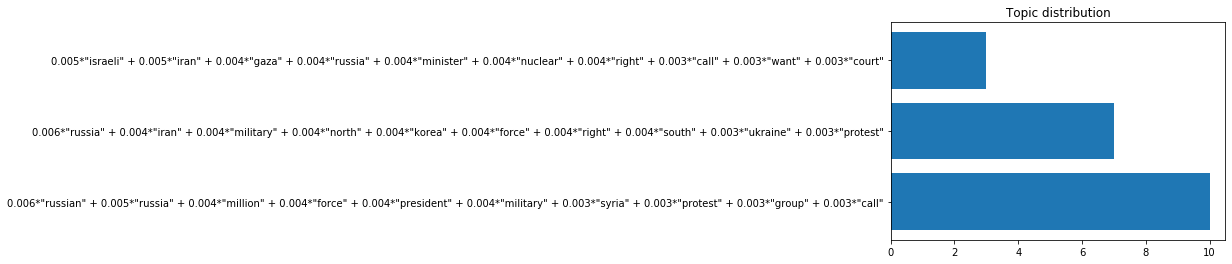

In [16]:
# What is the topic distribution?

names = data['daily_words_existing_lda'].value_counts().index
values = data['daily_words_existing_lda'].value_counts().values
plt.barh(names, values)
plt.yticks(names)
plt.title("Topic distribution")

##  Retraining the model using new dataset
Note: A caveat to doing this is that our new corpus is very small. We'll find some interesting changes, but beware that this model shouldn't be reused elsewhere. 

In [20]:
bow_corpus = [dictionary.doc2bow(headline) for headline in cleaned_all_headlines]

lda_bow_retrained = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2)

In [21]:
# Print each topic and how the words in those topics score (their relative weight)
for idx, topic in lda_bow_retrained.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.011*"world" + 0.011*"right" + 0.011*"time" + 0.011*"outbreak" + 0.011*"kill" + 0.009*"test" + 0.009*"work" + 0.009*"question" + 0.009*"best" + 0.008*"million"
Topic: 1 
Words: 0.018*"bank" + 0.018*"digital" + 0.017*"come" + 0.012*"need" + 0.011*"white" + 0.010*"test" + 0.010*"economy" + 0.010*"lockdown" + 0.010*"trailer" + 0.010*"trust"
Topic: 2 
Words: 0.012*"american" + 0.012*"office" + 0.011*"stay" + 0.011*"tell" + 0.011*"search" + 0.010*"time" + 0.010*"rule" + 0.010*"fight" + 0.010*"come" + 0.009*"best"
Topic: 3 
Words: 0.016*"come" + 0.013*"rick" + 0.012*"order" + 0.011*"spend" + 0.011*"reopen" + 0.010*"damage" + 0.010*"billion" + 0.010*"point" + 0.009*"warn" + 0.008*"facebook"
Topic: 4 
Words: 0.021*"live" + 0.015*"test" + 0.014*"join" + 0.014*"look" + 0.014*"content" + 0.014*"watch" + 0.013*"reopen" + 0.013*"murder" + 0.008*"right" + 0.008*"trust"
Topic: 5 
Words: 0.014*"reopen" + 0.013*"video" + 0.012*"store" + 0.012*"venezuela" + 0.011*"surge" + 0.011*"remin

In [22]:
# This function returns the best-scoring topic and score assocated with a headline
def new_topic_getter(headline):
    if headline == np.nan:
        return np.nan
    else:
        processed_headline = dictionary.doc2bow(preprocess(headline))
        topic_scores = sorted(lda_bow_retrained[processed_headline], key=lambda tup: -1*tup[1])
        topic = int(topic_scores[0][0])
        return topic
    
def new_word_getter(headline):
    if headline == np.nan:
        return np.nan
    else:
        processed_headline = dictionary.doc2bow(preprocess(headline))
        topic_scores = sorted(lda_bow_retrained[processed_headline], key=lambda tup: -1*tup[1])
        topic = int(topic_scores[0][0])
        return lda_bow_retrained.print_topic(topic, 10)    

# Check new topic for our test headline
new_topic_getter(unseen_document)
new_word_getter(unseen_document)

'0.011*"world" + 0.011*"right" + 0.011*"time" + 0.011*"outbreak" + 0.011*"kill" + 0.009*"test" + 0.009*"work" + 0.009*"question" + 0.009*"best" + 0.008*"million"'

In [23]:
data['daily_topic_new_lda'] = data['combined_headlines'].apply(new_topic_getter)
data['daily_words_new_lda'] = data['combined_headlines'].apply(new_word_getter)
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top21,Top22,Top23,Top24,Top25,combined_headlines,daily_topic_existing_lda,daily_words_existing_lda,daily_topic_new_lda,daily_words_new_lda
0,2020-04-20,0.0,"The US and China Want a Divorce, but Neither C...",The OnePlus 8 series is much cheaper in India ...,Facebook launches COVID-19 data maps for the U...,A guide to the NFL Draft: How to watch and wha...,"How to Do Less, With Journalist Celeste Headlee","What It Will Take to Reopen Everything, Accord...",Coronavirus: Reporter challenges Trump over Cu...,Deepwater Horizon: a decade of disaster,...,Severe weather hits Southern US,Jane Goodall says COVID-19 arose from our disr...,"Zoom, Skype, Microsoft Teams: Why you should c...",Facebook's interactive COVID-19 map displays s...,"All the things COVID-19 will change forever, a...",The US and China Want a Divorce but Neither C...,1,"0.006*""russian"" + 0.005*""russia"" + 0.004*""mill...",8,"0.015*""launch"" + 0.012*""want"" + 0.012*""change""..."
1,2020-04-21,0.0,Viruses Make Us Question What It Means to Be A...,Can You Be Happy in Quarantine?,Dr. Gupta takes virus test,How to End a Video Call Politely,The US Cities With the Worst Air Pollution All...,Marketing data platform Adverity raises $30M S...,Trump claims he will temporarily suspend immig...,What a century of fighting the flu tells us ab...,...,Telecom's Latest Dumb Claim: The Internet Only...,US hydroxychloroquine study shows no benefit t...,Razer's updated Blade Stealth gets a faster di...,The bootstrapper creates value,The bootstrapper creates value,Viruses Make Us Question What It Means to Be A...,1,"0.006*""russian"" + 0.005*""russia"" + 0.004*""mill...",0,"0.011*""world"" + 0.011*""right"" + 0.011*""time"" +..."
2,2020-04-22,1.0,Herd Immunity Won't Save Us,Sometimes the Best Cocktail Is a Glass of Wine,Chinese EV startup Byton furloughs hundreds in...,George Steinmetz's Bird's-Eye View of the Earth,The Deepwater Horizon Disaster Fueled a Gulf S...,Viral texts about coronavirus lockdown were am...,Facebook and Instagram test location labels to...,Is your family's chewing and slurping driving ...,...,Netflix subscribers soar like crazy as coronav...,The Latest: WHO chief hopes US will reconsider...,US failed to block UN virus vaccine resolution,TSA employees have contracted COVID-19 at 58 a...,Will There Be A Meat Shortage Because Of The C...,Herd Immunity Won t Save Us Sometimes the Best...,6,"0.005*""israeli"" + 0.005*""iran"" + 0.004*""gaza"" ...",6,"0.019*""chinese"" + 0.016*""best"" + 0.014*""report..."
3,2020-04-23,0.0,‘Pokémon Journeys’ will be a Netflix exclusive...,How Argentina’s Strict Covid-19 Lockdown Saved...,Gogoro’s first e-bike is coming to the US next...,US announces millions in aid for resource-rich...,Throw us your best 60-second pitch on May 13 a...,See Fauci's testing assessment that Trump disa...,A captivating 'Mandalorian' docuseries trailer...,Don't have a desk chair? All you need is a sea...,...,These 14 charts from Goldman Sachs show how mu...,Ventilator companies are opening up critical r...,Original Content podcast: ‘Too Hot to Handle’ ...,'We can’t afford to wait': coronavirus could s...,Here’s how you can ‘reset’ your sleep cycle du...,Pokémon Journeys’ will be a Netflix exclusive...,1,"0.006*""russian"" + 0.005*""russia"" + 0.004*""mill...",1,"0.018*""bank"" + 0.018*""digital"" + 0.017*""come"" ..."
4,2020-04-24,1.0,Lockdown Has Taken Us From Internet Time to Gr...,Refresh Your Book Stash at a Little Free Library,Stop Travel Memories From Appearing in Your So...,"If we let the US Postal Service die, we’ll be ...",30 years of Hubble telescope images,Where to Travel in an RV Right Now,Don't Inject Bleach (Sigh),First ever 'road map' of the moon released,...,Podcast: What the heck is a 'Planetary Compute...,Dyson won't build ventilators for the UK after...,US durable goods orders slump the most since 2...,COVID-19 forced Airbnb to rethink its product ...,Coronavirus: Trump suggests in

Text(0.5, 1.0, 'Topic distribution, new headlines')

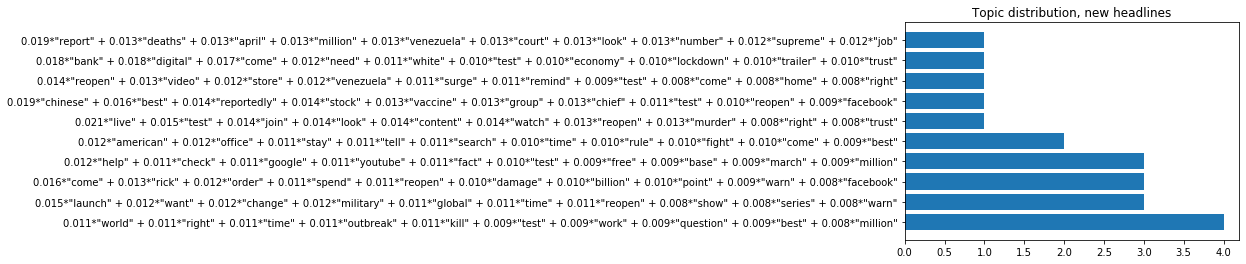

In [25]:
# What is the new topic distribution?

names = data['daily_words_new_lda'].value_counts().index
values = data['daily_words_new_lda'].value_counts().values
plt.barh(names, values)
plt.yticks(names)
plt.title("Topic distribution, new headlines")

In [26]:
# Save updated data
data.to_csv("../Data/Combined_News_NASDAQ.csv", index=False)